# Lab 8: Define and Solve an ML Problem of Your Choosing

In [165]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [166]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I chose the census dataset to predict whether a person has an income of less than or greater than 50k. This would be a supervised binary classification problem. My features would most likely be age, sex, workclass, occupation, education, education-num, and hours-per-week. This list may change based on the real feature-to-label correlation values. This is an important problem to solve because it can reveal any inequalities in income, which policy-makers can address. It can also be used for career-matching by companies to provide general estimates of income for people.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [167]:
df.shape

(32561, 15)

In [168]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [169]:
# remove unlikely features
df.drop(["fnlwgt","native-country"], axis=1, inplace=True)

In [170]:
# missing values?
df.isnull().sum()

age                162
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
income_binary        0
dtype: int64

In [171]:
# remove null values in categorical features
cat_cols = df.select_dtypes(include='object').columns
df = df.dropna(subset=cat_cols)
df.isnull().sum()

age               153
workclass           0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex_selfID          0
capital-gain        0
capital-loss        0
hours-per-week    300
income_binary       0
dtype: int64

In [172]:
# replace null values in numerical featuress with the median
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
income_binary     0
dtype: int64

In [173]:
# check distributions to address outliers
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.440849,10.130314,630.954587,88.910216,40.951201
std,13.093005,2.562469,2453.058671,405.657203,11.935874
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,14084.000000,4356.000000,99.000000


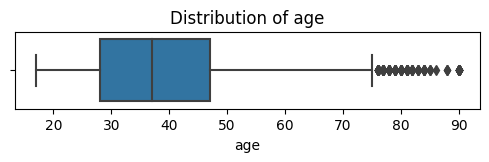

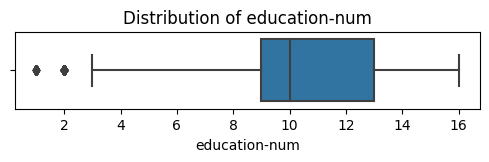

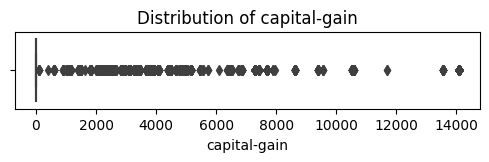

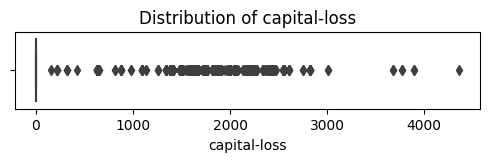

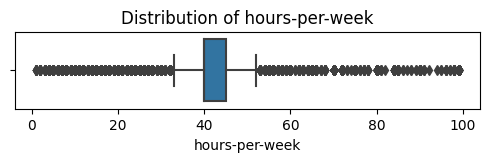

In [174]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [175]:
#winsorize these features
from scipy.stats.mstats import winsorize

df['capital-gain'] = winsorize(df['capital-gain'], limits=[0.01, 0.01])  # both tails
df['capital-loss'] = winsorize(df['capital-loss'], limits=[0.01, 0.01])  # both tails
df['age'] = winsorize(df['age'], limits=[0, 0.025])  # upper tail only

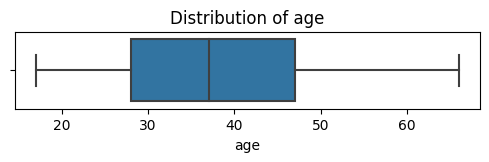

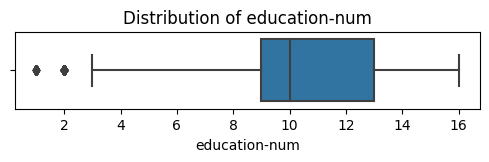

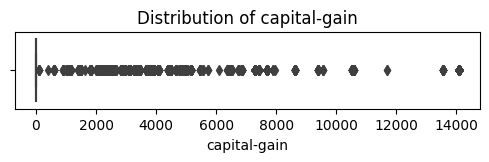

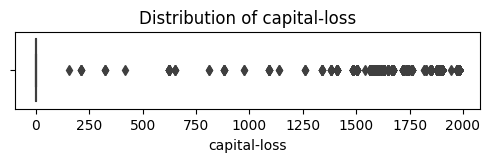

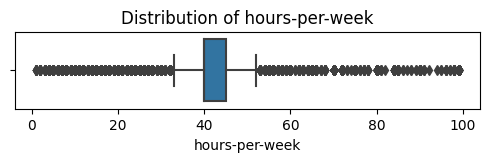

In [176]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [177]:
# identify which features to one-hot-encode
cat_cols = df.select_dtypes("object").columns
df[cat_cols].nunique()

workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
income_binary      2
dtype: int64

In [178]:
# one-hot-encoding categorical features
to_encode = ['workclass','education','marital-status','occupation','relationship','race','sex_selfID']
for col in to_encode:
    df_enc = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df.drop(columns=col), df_enc], axis=1)
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income_binary,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female
0,39.0,13,2174,0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50.0,13,0,0,13.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38.0,9,0,0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,53.0,7,0,0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,28.0,13,0,0,40.0,<=50K,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [179]:
df['>50k'] = df['income_binary'] == '>50K'
df.drop(columns='income_binary', inplace=True)

In [180]:
y=df[">50k"]
X=df.drop(">50k",axis=1)

In [181]:
# choose most importatn features to predict label
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10)

age                                  0.234027
hours-per-week                       0.116053
capital-gain                         0.104842
education-num                        0.072257
marital-status_Married-civ-spouse    0.066364
relationship_Husband                 0.057010
capital-loss                         0.032956
marital-status_Never-married         0.024150
occupation_Exec-managerial           0.019211
occupation_Prof-specialty            0.016003
dtype: float64

In [203]:
features = ["age","hours-per-week","education-num", "marital-status_Married-civ-spouse"]
# cannot choose capital-gain because it is indicative of knowing the individual's finances, something that would not be available during real-time prediction
label = ">50k"

X = df[features]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [196]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23038, 4)
(23038,)
(7680, 4)
(7680,)


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

My new feature list  consists of the top 3 important features based on feature importance.
I plan to try various models and empirically test which is the best one. Some of the models I will try various ensemble models with decision trees such as gradient boosting, and random forest. I will compare the RMSE and R2 of all models to find the best performing one.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [197]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [235]:
# train decision tree with grid search
from sklearn.tree import DecisionTreeRegressor
param_grid = {"max_depth":[4,6,8],"min_samples_leaf":[3,5,7]}

print(param_grid)

{'max_depth': [4, 6, 8], 'min_samples_leaf': [3, 5, 7]}


In [236]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
grid = GridSearchCV(model, param_grid, cv=cv, scoring = "accuracy")
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [3, 5, 7]},
             scoring='accuracy')

In [237]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
print("Accuracy scores:", scores)
print("Mean accuracy score:", scores.mean())


Accuracy scores: [0.79427083 0.79947917 0.79915365 0.81181833 0.80188833]
Mean accuracy score: 0.8013220607636062


In [238]:
dt_best_params = grid.best_params_

dt_best_params

{'max_depth': 8, 'min_samples_leaf': 7}

In [239]:
# KNN model - empircally test for K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(10, 26)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

    print(f'K = {k}: Accuracy = {acc:.4f}')


K = 10: Accuracy = 0.7927
K = 11: Accuracy = 0.7956
K = 12: Accuracy = 0.7961
K = 13: Accuracy = 0.7936
K = 14: Accuracy = 0.7940
K = 15: Accuracy = 0.7960
K = 16: Accuracy = 0.7980
K = 17: Accuracy = 0.7997
K = 18: Accuracy = 0.7995
K = 19: Accuracy = 0.7980
K = 20: Accuracy = 0.7980
K = 21: Accuracy = 0.7982
K = 22: Accuracy = 0.7983
K = 23: Accuracy = 0.7982
K = 24: Accuracy = 0.7978
K = 25: Accuracy = 0.8003


In [ ]:
best_K = 17

In [240]:
#use both DT and KNN in stacking
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

estimators = [
    ("DT", DecisionTreeClassifier(max_depth=8, min_samples_leaf=7)),
    ("KNN", KNeighborsClassifier(n_neighbors=17))
]

print('Implement Stacking...')

stacking_model = StackingClassifier(estimators=estimators, passthrough=False)
stacking_model.fit(X_train, y_train)

print('End')


Implement Stacking...
End


In [241]:
y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8124


In [245]:
# gbdt classifier
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(random_state=1234)

param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.05, 0.1, 0.2]}

grid = GridSearchCV(estimator=gbdt,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5, verbose=1)

grid.fit(X_train, y_train)

print("best parameters:", grid.best_params_)
print("best accuracy score:", grid.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
best parameters: {'learning_rate': 0.05, 'n_estimators': 150}
best accuracy score: 0.828761062197019


In [248]:
# train random forest
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [8],
    'min_samples_leaf': [2, 5, 7, 10],
}

rf = RandomForestClassifier(random_state=1234)

grid = GridSearchCV(estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5, verbose=1
)

grid.fit(X_train, y_train)

print("best parameters:", grid.best_params_)
print("best accuracy score:", grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'n_estimators': 150}
best accuracy score: 0.8277194332145527


## comparing performances
accuracy scores for each model with its best paramters on both training and test set

In [251]:
best_knn = KNeighborsClassifier(n_neighbors=17)
best_dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=7, random_state=1234)
best_rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=2, random_state=1234)
best_gbdt = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, random_state=1234)

estimators = [
    ("DT", DecisionTreeClassifier(max_depth=8, min_samples_leaf=7)),
    ("KNN", KNeighborsClassifier(n_neighbors=17))]

stacking = StackingClassifier(estimators=estimators, passthrough=False)

In [252]:
models = {
    "KNN": best_knn,
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "GBDT": best_gbdt,
    "Stacking": stacking
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results.append((name, train_acc, test_acc))
    print(f"{name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

KNN - Train Accuracy: 0.8284, Test Accuracy: 0.7997
Decision Tree - Train Accuracy: 0.8315, Test Accuracy: 0.8125
Random Forest - Train Accuracy: 0.8354, Test Accuracy: 0.8159
GBDT - Train Accuracy: 0.8319, Test Accuracy: 0.8120
Stacking - Train Accuracy: 0.8347, Test Accuracy: 0.8124


### conclusion
although, everything is a close tie, random forest seems to have highest train and test performance

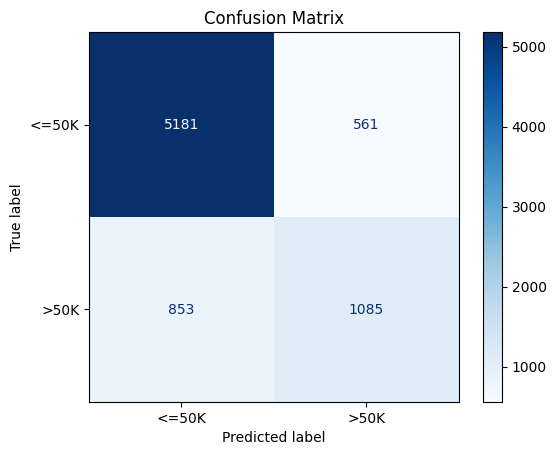

In [257]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=50K", ">50K"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")

plt.show()